## 모델링 하기

#### 컬럼 : T-Shir, Pullover, Shirt

#### 사용모델 : VGGNet

#### 이미지강화 사용 : True

In [ ]:
#라이브러리 가져오기
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
# np행렬 생략 부분 출력 펼쳐서 보기 옵션
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [ ]:
#데이터 분류하기
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# sorting based on index
idx = np.argsort(train_labels)
train_images = train_images[idx]
train_labels = train_labels[idx]

idx = np.argsort(test_labels)
test_images = test_images[idx]
test_labels = test_labels[idx]

labels = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", 
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

label_mapping = dict(zip(labels, range(10)))

def get_data(mapping, classes):
    # X_train, X_test, y_train, y_test = np.array([]), np.array([]), np.array([]), np.array([])
    X_train, X_test, y_train, y_test = [],[],[],[]
    for cls in classes:
        idx = mapping[cls]
        start = idx*6000
        end = idx*6000+6000
        X_train.append(train_images[start: end])
        # X_train = np.append(X_train, train_images[start: end])
        y_train.append(train_labels[start: end])
        # y_train = np.append(X_train, train_labels[start: end])
        start = idx*1000
        end = idx*1000+1000
        X_test.append(test_images[start: end])
        # X_test = np.append(X_test, test_images[start: end])
        y_test.append(test_labels[start: end])
        # y_test = np.append(y_test, test_labels[start: end])
    return X_train, X_test, y_train, y_test


train_X, test_X, train_Y, test_Y = get_data(label_mapping, 
                                            classes=["T-Shirt", "Pullover", "Shirt"])

test_Y

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#레이어 넘버 변환
empty_array1 = np.array([])
# print(type(d))
for arr in test_Y:
    if arr[0] == 2:
        arr[:] = 1

    elif arr[0] == 6:
        arr[:] = 2

    # print(type(arr))
    empty_array1 = np.append(empty_array1,arr)
test_Y = empty_array1

# train_Y 5개의 어레이를 1개의 어레이로 만들기
empty_array2 = np.array([])

for arr in train_Y:
    if arr[0] == 2:
        arr[:] = 1

    elif arr[0] == 6:
        arr[:] = 2

    empty_array2 = np.append(empty_array2, arr)
train_Y = empty_array2

test_Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
#test_X 리스트를 하나의 array로 만들기

for idx, img in enumerate(test_X):
    if idx == 0 :
        test_img0 = img
    elif idx == 1:
        test_img1 = img
    else:
        test_img2 = img
print(test_img0.shape, test_img1.shape, test_img2.shape)

# train_X 리스트를 하나의 array로 만들어 주기 위해서 컬럼 별로 나누는 과정
for idx, img in enumerate(train_X):
    if idx == 0 :
        train_img0 = img
    elif idx == 1:
        train_img1 = img
    else:
        train_img2 = img
print(train_img0.shape, train_img1.shape, train_img2.shape)


(1000, 28, 28) (1000, 28, 28) (1000, 28, 28)
(6000, 28, 28) (6000, 28, 28) (6000, 28, 28)


In [ ]:
# test_X 하나로 합쳐주는 과정 1번만 진행 해야 합니다.
test_img0 = np.vstack((test_img0, test_img1))
test_X = np.vstack((test_img0, test_img2))

# train_X 하나로 합쳐주는 과정
train_img0 = np.vstack((train_img0, train_img1))
train_X = np.vstack((train_img0, train_img2))

print(train_X.shape, test_X.shape)

(18000, 28, 28) (3000, 28, 28)


In [ ]:
#shuffle 해주기
from sklearn.utils import shuffle
train_X, train_Y = shuffle(train_X, train_Y)
test_X, test_Y = shuffle(test_X, test_Y)

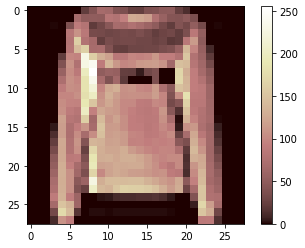

In [ ]:
plt.imshow(train_X[2], cmap='pink')
plt.colorbar()
plt.show()
# print('정답범주', train_Y[2])

In [ ]:
# 밑에 vggnet 모방 코드 사용 하려면 여기 셀 실행 해야함/ input 을 맞춰주기 위함.

print(train_X.shape, test_X.shape)
# (미니배치크기, 입력이미지행수, 입력이미지열수, 입력이미지체널수)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

(18000, 28, 28) (3000, 28, 28)
(18000, 28, 28, 1) (3000, 28, 28, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
rotation_range = 10,
zoom_range = 0.10,
shear_range = 0.5,
width_shift_range = 0.10,
height_shift_range = 0.10,
horizontal_flip = True,
vertical_flip = False)

augment_size = 6000
# 원본 이미지 무작위 선택 및 데이터 복사
x_choice = np.random.choice(train_X.shape[0], size = augment_size, replace=False)
x_augmented = train_X[x_choice].copy()
y_augmented = train_Y[x_choice].copy()
# 이미지를 변형할 원본 이미지를 찾기 위한 함수 예제 (중복허용O / 중복허용x)
print(np.random.randint(train_X.shape[0], size = augment_size))
print(np.random.choice(train_X.shape[0], size = augment_size, replace=False))


[15315  1935 11591  1206  6147 10206  9422  8991  7424  3838 17354  5978  9531  8499 16639  8126  8396  7674  1195  2242 12618 13596  9043 17913 14078  3096  1365  3825 10244  8786  7462 16738 13491 12845  4322  2604 12543 12335 15737  8489 17085   701 11975 10980  1749 14107 14256  6275 14015  3232 11471 17777 15603  7107  1113 14732  8796  6794 10755  3383  4360  5634  8720  4495  4379  6766 16314  4184   949  8004  8255   354 17716  6695 17694  5546  8103  1469 16868 13818  7488  3249  9205 15329  5235 16630  9109  6499  6765  5363  2891  6522 14147  1468  6554 16598 15054 16075 12635  5141 10328  5597  9757 10443 17995  2896 11163 17267   702  8124 17526  9499    86  5606 15703 17327 10572  2239 10585   460 11850 15156  9188 16287   468   563 13373 14065  7677  5452  7696  3179 13032  8275  2464  6512  6906  5447 13534  9707  8278 10255 17406 17101  9389  7300 10246   996  8912  1559 10114 16420  2544  1000  9555 15456 13654  8184 12760   381 17160 16724 13038  9800 10164 12038 133

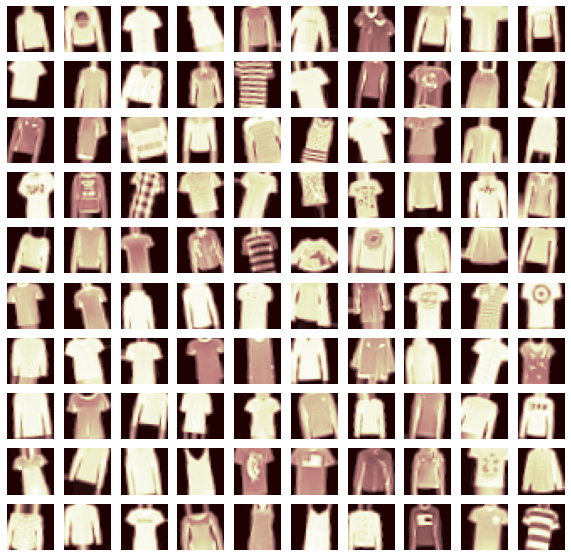

In [ ]:
# 보강 이미지 데이터 생성
x_augmented = image_generator.flow(x = x_augmented,
y = np.zeros(augment_size),
batch_size = augment_size,
shuffle = False).next()[0]
#보강 이미지 확인
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(x_augmented[i].reshape(28,28), cmap='pink')
plt.show()

In [ ]:
#데이터 합쳐주기
train_X = np.concatenate((train_X,x_augmented))
train_Y = np.concatenate((train_Y,y_augmented))
#보강 데이터 결합 확인
print(train_X.shape)


(24000, 28, 28, 1)


In [ ]:
#min-max-regulation 최소 최대값 데이터 평준화
train_X = train_X / 255.0
test_X = test_X / 255.0
# print(train_X[2])

In [ ]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=3, activation = 'softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 6, 6, 256)       

In [ ]:
history = model.fit(train_X, train_Y, epochs=500, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/500
563/563 [==============================] - 4s 8ms/step - loss: 0.5808 - accuracy: 0.7392 - val_loss: 0.8879 - val_accuracy: 0.5992
Epoch 2/500
563/563 [==============================] - 4s 7ms/step - loss: 0.4099 - accuracy: 0.8295 - val_loss: 0.8275 - val_accuracy: 0.6175
Epoch 3/500
563/563 [==============================] - 4s 8ms/step - loss: 0.3623 - accuracy: 0.8532 - val_loss: 0.8222 - val_accuracy: 0.6375
Epoch 4/500
563/563 [==============================] - 4s 7ms/step - loss: 0.3425 - accuracy: 0.8589 - val_loss: 0.8283 - val_accuracy: 0.6305
Epoch 5/500
563/563 [==============================] - 4s 8ms/step - loss: 0.3225 - accuracy: 0.8687 - val_loss: 0.7660 - val_accuracy: 0.6438
Epoch 6/500
563/563 [==============================] - 4s 8ms/step - loss: 0.3154 - accuracy: 0.8719 - val_loss: 0.7746 - val_accuracy: 0.6497
Epoch 7/500
563/563 [==============================] - 4s 8ms/step - loss: 0.2993 - accuracy: 0.8776 - val_loss: 0.7703 - val_accuracy: 0.6510

In [ ]:
model.evaluate(test_X,test_Y)

94/94 [==============================] - 0s 4ms/step - loss: 0.2867 - accuracy: 0.8833


[0.286714643239975, 0.8833333253860474]

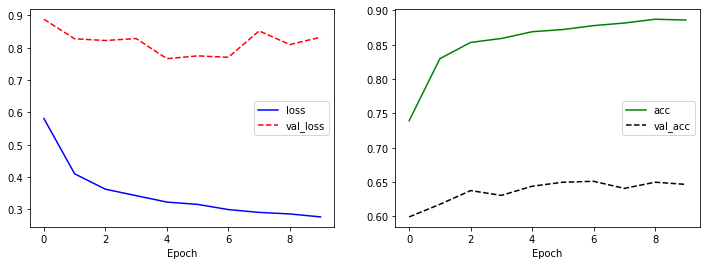

In [ ]:
#모델 학습 후 로스값과 정확도의 이미지 처리
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
#모델 저장 하기 
model.save('fAIshin_P_T6.h5')

(1200, 1200, 3)
########################################
VERSION : 1.1 
 Interesting tools to be added to the workflow pipe!!!
########################################


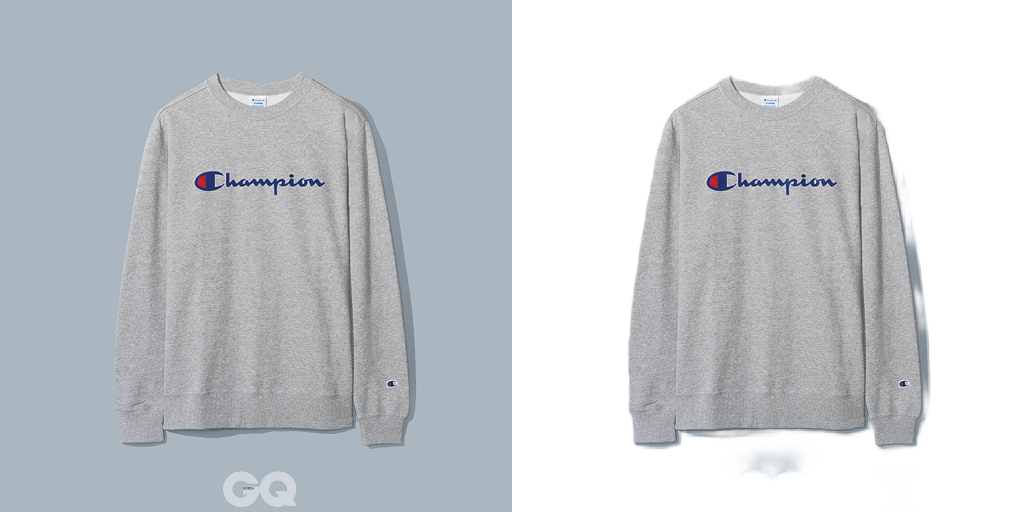

In [ ]:
#기존 우리의 openCV를 통해 의류를 분류해 내기

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/drive/My Drive/test_1/test_9.jpg'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/fAIshion_P/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb ----> return PNG"""

        name =  self.imageid
        file = cv2.imread(name)
        print(file.shape)

        # b,g,r= cv2.split(file)
        # file = cv2.merge([b,g,r])

        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        
    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code
api    = fashion_tools(f,saved)
image = api.get_dress(True)

print("########################################")
print(api.development())
print("########################################")

# cv2.imwrite('result.jpeg', image_)
cv2_imshow(image)
# print(image.shape)

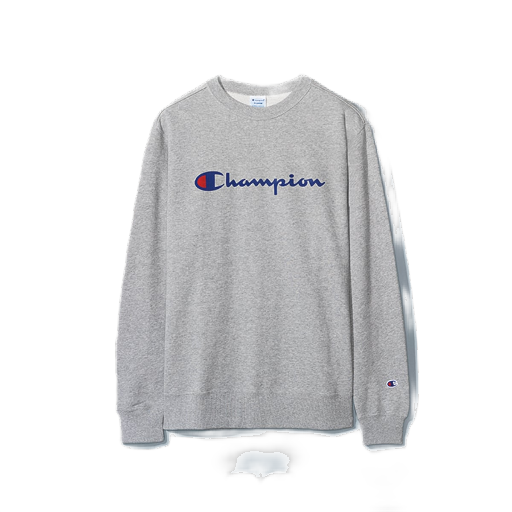

In [ ]:
# 이미지 자르고, 투명값 검정배경 입혀주기.

image_crop = image[:,512:]
image_crop = np.uint8(image_crop)
# cv2_imshow(image_crop)

for i in image_crop:
    for j in i:
        if j[3] < 40:
            j[0] = 0
            j[1] = 0
            j[2] = 0

cv2_imshow(image_crop)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 190 182   0   0   0 178   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14 186 195 194 227 218 185 192 197 189   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 194 180 185 186 189 183 188 176 184 182 191 191   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 183 184 184 188 181 191 183 191 178 177 184 180  94   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 167 189 185 192 178 189 185 167 185 176 191 17

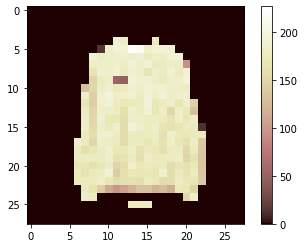

(1, 28, 28)

In [ ]:
# 리사이즈 인풋값 맞춰 주기.
image_resize = cv2.resize(image_crop, (28,28))
cv2_imshow(image_resize)

# 그레이 스케일.. 후 픽셀 출력..
image_gray = cv2.cvtColor(image_resize, cv2.COLOR_BGRA2GRAY)
cv2_imshow(image_gray)
print(image_gray)

# 조금 더 크게 시각화..
plt.imshow(image_gray, cmap='pink')
plt.colorbar()
plt.show()

# 정규화 해준다.
input_image = image_gray/255.0

# input값이 3차원 이여서 차원을 늘려준다.
input_image = np.reshape(input_image, (1,28,28))
input_image.shape

In [ ]:
test_X.shape
input_image = input_image.reshape(1,28,28,1)

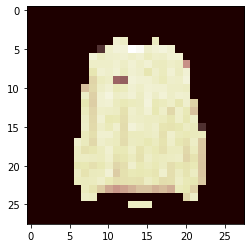

[[1.2197068 1.0548289 1.7254643]]


In [ ]:
#예측 수행
input_predict = model.predict(input_image)+1
#예측 이미지 확인 
plt.imshow(input_image.reshape(28,28), cmap = 'pink')
plt.show()

#예측 결과 확인 
print(input_predict)

In [ ]:
max_value = np.max(input_predict)
# print(max_value)
max_idx = np.where(input_predict == max_value)
# print(max_idx)
# print(max_idx[1][0])
predict_idx = max_idx[1][0]
predict_idx

2